# linear regression of Life Expectancy

Now we shall do linear regression on the data to find relationship between life expectancy and schooling

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("Life Expectancy Data.csv");
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df=df[["Life expectancy ","Schooling"]]

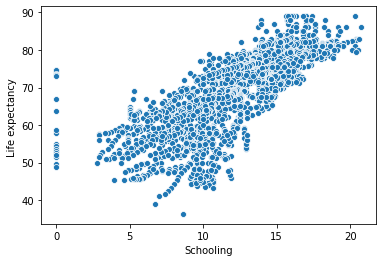

In [4]:
sns.scatterplot(data=df,x="Schooling",y="Life expectancy ")

In [5]:
df=df.replace("",np.NAN)

In [6]:
df.dropna(axis=0,inplace=True)
df

,Life expectancy,Schooling
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5
...,...,...
2933,44.3,9.2
2934,44.5,9.5
2935,44.8,10.0
2936,45.3,9.8


As we see there is a hint of positive correlation

Let us find the relation between schooling and Life expectancy

In [7]:
LinReg=LinearRegression()

In [8]:
x=df["Schooling"]
y=df["Life expectancy "]

In [9]:
x=list(x)
x=np.reshape(x,(-1,1))
y=list(y)

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33)

In [12]:
LinReg.fit(X_train,Y_train)

LinearRegression()

In [13]:
Y_pred=LinReg.predict(X_test)

In [14]:
print(mean_squared_error(Y_test,Y_pred))

39.166281889696265


In [15]:
print(r2_score(Y_test,Y_pred))

0.5307546892893037


In [16]:
c=LinReg.intercept_
c

44.23146669628834

In [17]:
m=LinReg.coef_
m

array([2.09917186])

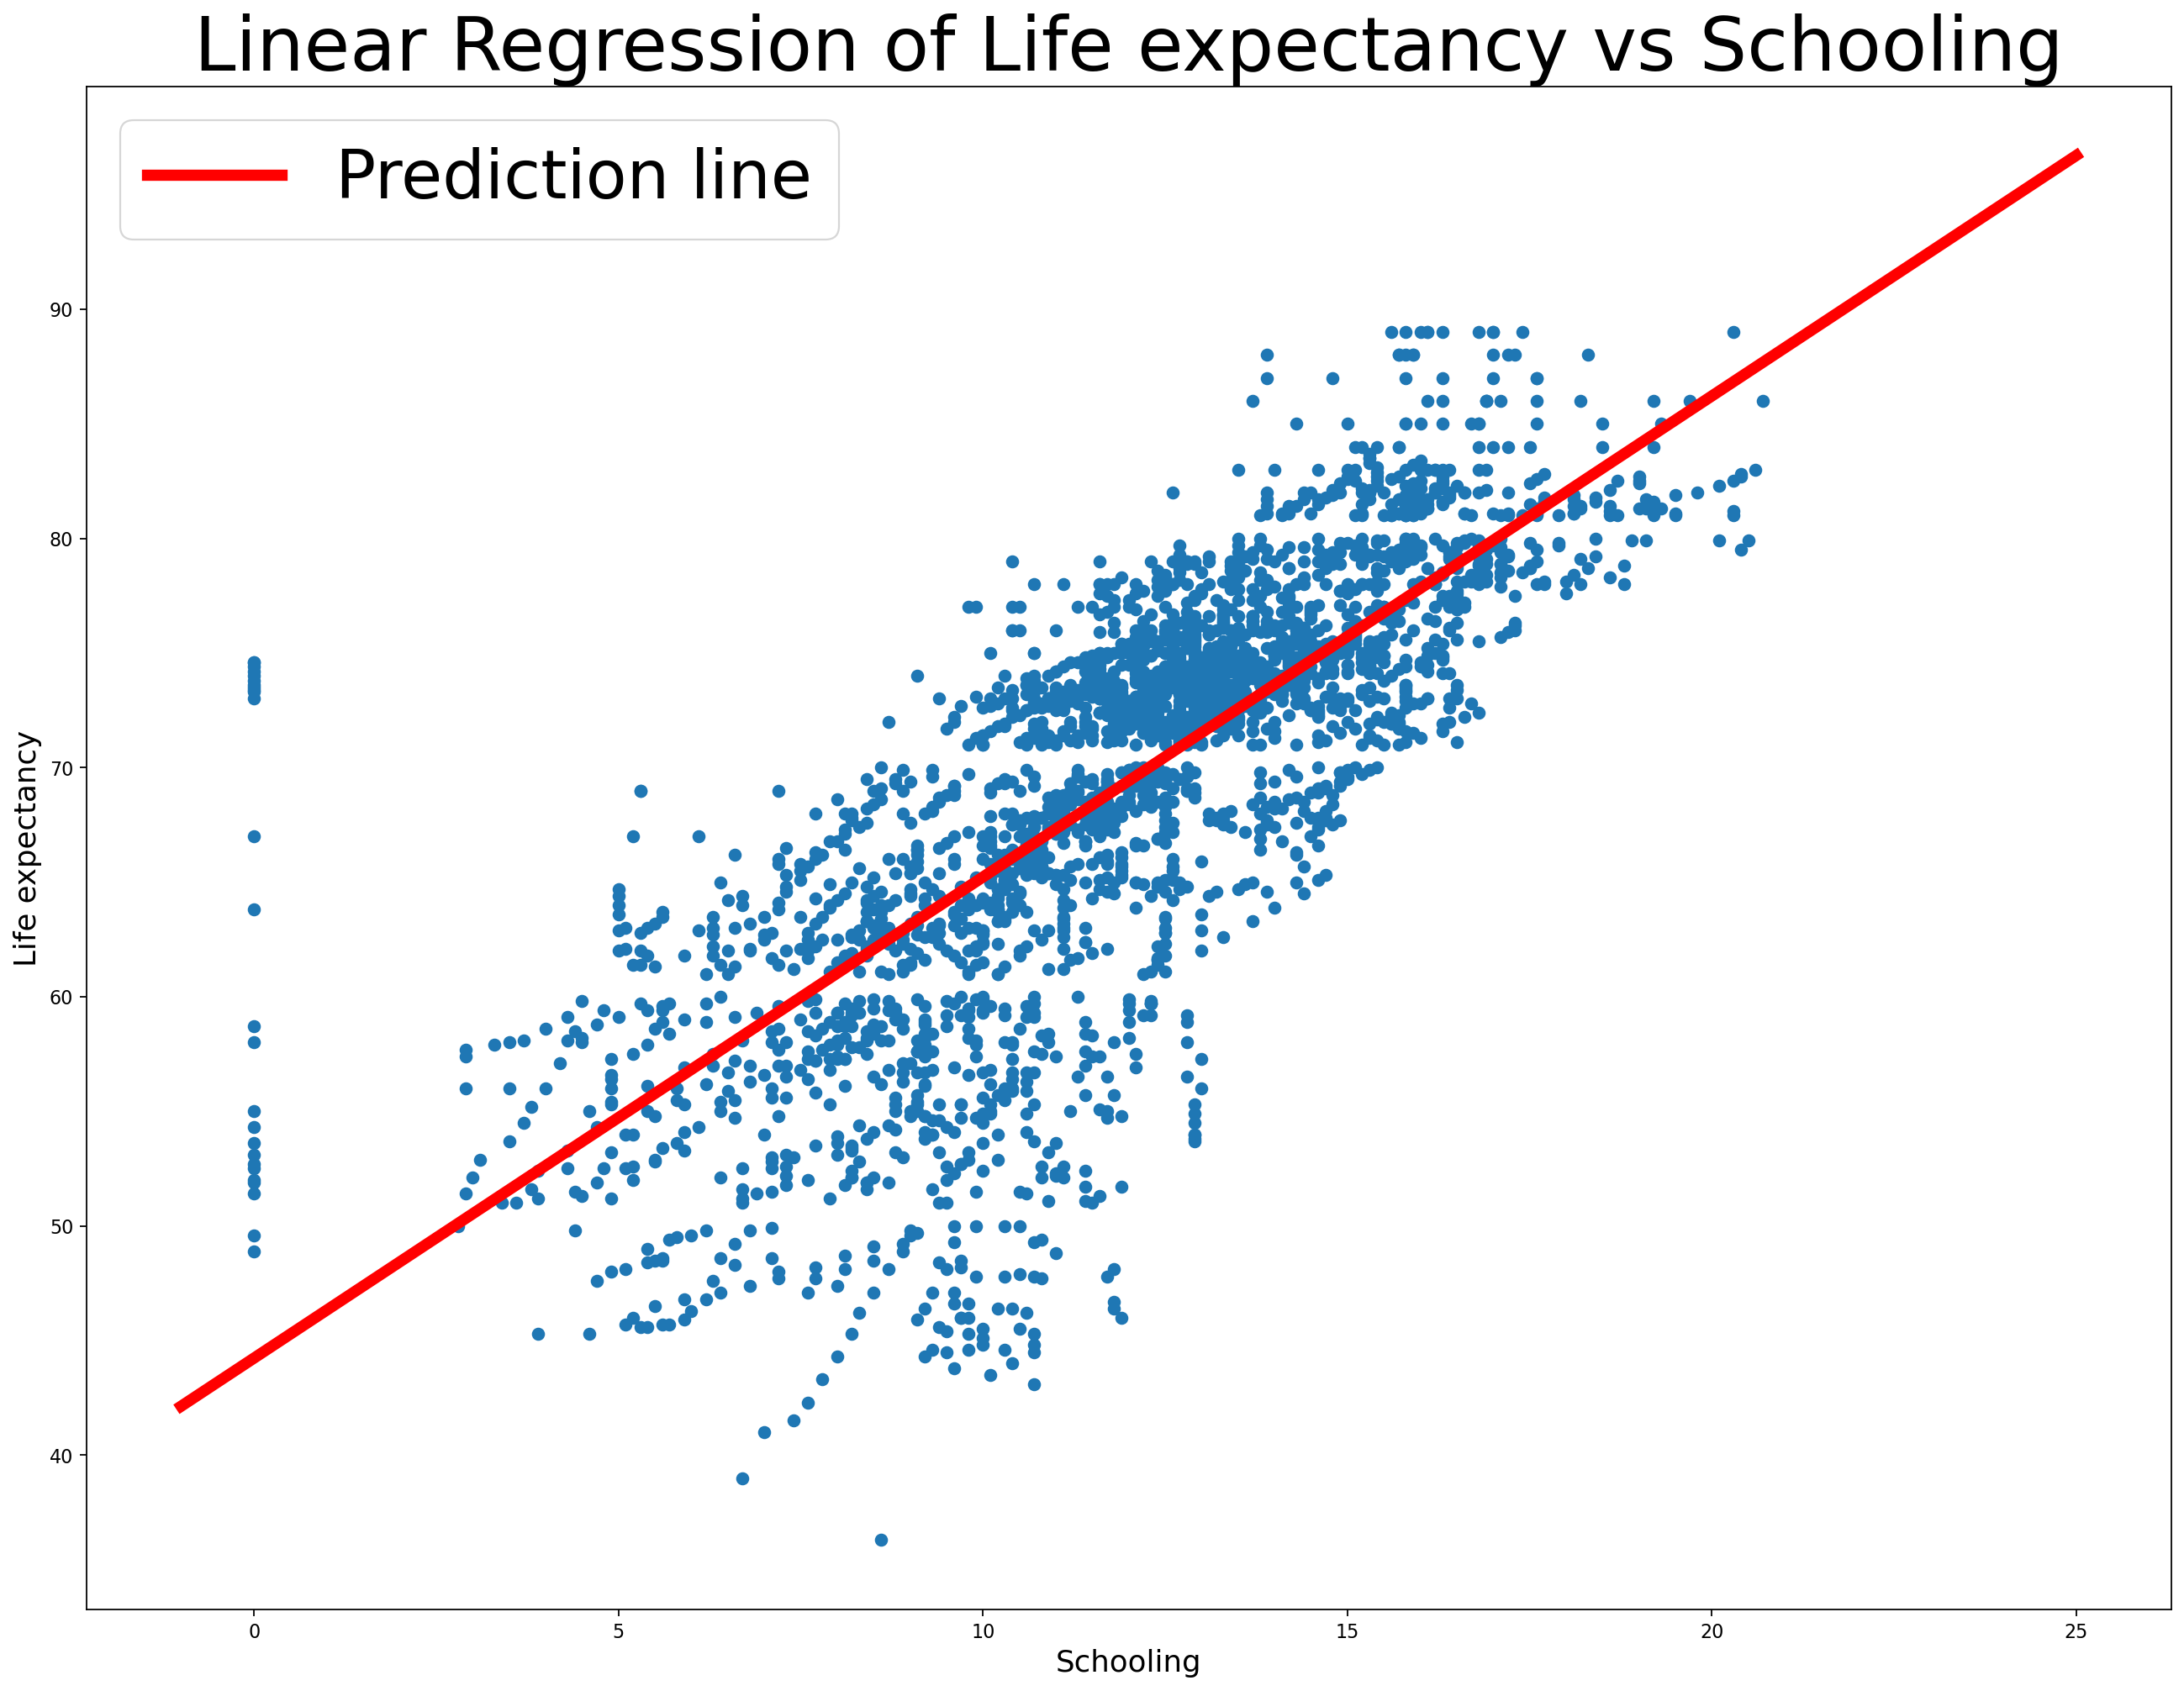

In [45]:
x1=np.linspace(-1,25,100)
y1=m*x1+c
plt.figure(figsize=(20, 15), dpi=160)
plt.scatter(df["Schooling"],df["Life expectancy "])

plt.plot(x1, y1, '-r',label="Prediction line",linewidth=6)
plt.title("Linear Regression of Life expectancy vs Schooling",fontsize=40)
plt.ylabel("Life expectancy",fontsize=16)
plt.xlabel("Schooling",fontsize=16)
plt.legend(loc="upper left",prop={'size':"36"})
plt.show()